In [1]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'C:\\spark\\spark-3.0.1-bin-hadoop2.7'

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession
import pyspark.sql.functions as f
import sys

In [3]:
conf = pyspark.SparkConf().setAppName('appName').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing
import itertools

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [6]:
play= spark.read.option('header',True).csv('../nfl/PlayList.csv')
injury = injury= spark.read.option('header',True).csv('../nfl/InjuryRecord.csv')

In [7]:
play.show()

+---------+-------+----------+--------------+---------+----------+-----------+---------+-----------+--------------+--------+--------------+--------+-------------+
|PlayerKey| GameID|   PlayKey|RosterPosition|PlayerDay|PlayerGame|StadiumType|FieldType|Temperature|       Weather|PlayType|PlayerGamePlay|Position|PositionGroup|
+---------+-------+----------+--------------+---------+----------+-----------+---------+-----------+--------------+--------+--------------+--------+-------------+
|    26624|26624-1| 26624-1-1|   Quarterback|        1|         1|    Outdoor|Synthetic|         63|Clear and warm|    Pass|             1|      QB|           QB|
|    26624|26624-1| 26624-1-2|   Quarterback|        1|         1|    Outdoor|Synthetic|         63|Clear and warm|    Pass|             2|      QB|           QB|
|    26624|26624-1| 26624-1-3|   Quarterback|        1|         1|    Outdoor|Synthetic|         63|Clear and warm|    Rush|             3|      QB|           QB|
|    26624|26624-1| 26

In [8]:
play.select('StadiumType').distinct().show()

+--------------------+
|         StadiumType|
+--------------------+
|       Domed, closed|
|        Dome, closed|
|                Bowl|
|              Cloudy|
|         Closed Dome|
|              Indoor|
|     Retr. Roof-Open|
|             Outdoor|
|Outdoor Retr Roof...|
|                null|
|             Indoors|
|    Retractable Roof|
|                Open|
|            Outdoors|
|         Domed, Open|
|   Retr. Roof - Open|
|              Outdor|
|   Retr. Roof-Closed|
|              Oudoor|
|               Domed|
+--------------------+
only showing top 20 rows



In [9]:
#replace value to outdoor or indoor
#play = play.withColumn("StadiumType", f.when(f.col("StadiumType")=='Domed, closed', 'Indoor').otherwise(f.col('StadiumType')))
#play = play.withColumn("StadiumType", f.when(f.col("StadiumType")=='Dome, closed', 'Indoor').otherwise(f.col('StadiumType')))
#play = play.withColumn("StadiumType", f.when(f.col("StadiumType")=='Bowl', ' Outdoor').otherwise(f.col('StadiumType')))

In [10]:
#play_injury = play.join(injury, (play.GameID == injury.GameID) & (play.PlayerKey == injury.PlayerKey)& (play.FieldType == injury.Surface))
#play_injury.show()

In [11]:
from pyspark.sql.functions import col
injury = injury.withColumn('level of injury', (col('DM_M1')+col('DM_M7')+col('DM_M28')+col('DM_M42')).cast('integer'))
injury.show()

+---------+--------+-----------+--------+---------+-----+-----+------+------+---------------+
|PlayerKey|  GameID|    PlayKey|BodyPart|  Surface|DM_M1|DM_M7|DM_M28|DM_M42|level of injury|
+---------+--------+-----------+--------+---------+-----+-----+------+------+---------------+
|    39873| 39873-4| 39873-4-32|    Knee|Synthetic|    1|    1|     1|     1|              4|
|    46074| 46074-7| 46074-7-26|    Knee|  Natural|    1|    1|     0|     0|              2|
|    36557| 36557-1| 36557-1-70|   Ankle|Synthetic|    1|    1|     1|     1|              4|
|    46646| 46646-3| 46646-3-30|   Ankle|  Natural|    1|    0|     0|     0|              1|
|    43532| 43532-5| 43532-5-69|   Ankle|Synthetic|    1|    1|     1|     1|              4|
|    41145| 41145-2| 41145-2-60|    Knee|  Natural|    1|    0|     0|     0|              1|
|    46014|46014-10|46014-10-22|   Ankle|Synthetic|    1|    1|     1|     1|              4|
|    44860| 44860-5| 44860-5-52|    Knee|  Natural|    1|   

In [12]:
key_play_columns= play.select('PlayerKey','GameID',"Temperature", "Weather",'StadiumType',"FieldType")

In [13]:
key_play_columns.distinct().show()

+---------+--------+-----------+--------------------+-----------------+---------+
|PlayerKey|  GameID|Temperature|             Weather|      StadiumType|FieldType|
+---------+--------+-----------+--------------------+-----------------+---------+
|    26624| 26624-7|         56|Cloudy, fog start...|          Outdoor|Synthetic|
|    27363| 27363-2|         85|       Mostly Cloudy|          Indoors|Synthetic|
|    34259|34259-20|         33|              Cloudy|Retr. Roof-Closed|Synthetic|
|    36621| 36621-1|         68|  Controlled Climate|          Indoors|Synthetic|
|    36696| 36696-8|         49|               Sunny|          Outdoor|  Natural|
|    36877|36877-12|         80|              Cloudy|          Outdoor|  Natural|
|    38228|38228-25|         52|               Sunny|         Outdoors|  Natural|
|    38325|38325-23|         46|               Sunny|          Outdoor|Synthetic|
|    38364| 38364-2|         72|              Cloudy|             null|Synthetic|
|    39654|39654

In [14]:
key_play_columns.distinct().count()

5712

In [15]:
key_injury_columns= injury.select('PlayerKey','GameID',"BodyPart",'level of injury')

In [16]:
key_injury_columns.show()

+---------+--------+--------+---------------+
|PlayerKey|  GameID|BodyPart|level of injury|
+---------+--------+--------+---------------+
|    39873| 39873-4|    Knee|              4|
|    46074| 46074-7|    Knee|              2|
|    36557| 36557-1|   Ankle|              4|
|    46646| 46646-3|   Ankle|              1|
|    43532| 43532-5|   Ankle|              4|
|    41145| 41145-2|    Knee|              1|
|    46014|46014-10|   Ankle|              4|
|    44860| 44860-5|    Knee|              2|
|    44806| 44806-7|    Knee|              1|
|    45962| 45962-8|   Ankle|              2|
|    46331| 46331-4|   Ankle|              4|
|    36621|36621-13|    Foot|              4|
|    44492| 44492-3|   Ankle|              4|
|    43505| 43505-2|    Foot|              4|
|    41094| 41094-1|    Knee|              4|
|    40474| 40474-1|    Knee|              1|
|    39656| 39656-2|    Knee|              2|
|    46587| 46587-2|    Knee|              4|
|    46119| 46119-3|    Knee|     

In [17]:
key_injury_columns.count()

105

In [18]:
play_injury = key_injury_columns.join(key_play_columns.distinct(), ['GameID'],'inner')


In [19]:
play_injury.show()

+--------+---------+--------+---------------+---------+-----------+--------------------+----------------+---------+
|  GameID|PlayerKey|BodyPart|level of injury|PlayerKey|Temperature|             Weather|     StadiumType|FieldType|
+--------+---------+--------+---------------+---------+-----------+--------------------+----------------+---------+
| 46331-4|    46331|   Ankle|              4|    46331|         61|               Sunny|         Outdoor|Synthetic|
| 47334-8|    47334|    Knee|              2|    47334|         74|         Clear skies|          Indoor|Synthetic|
| 46074-7|    46074|    Knee|              2|    46074|         76|       Partly Cloudy|            Open|  Natural|
| 46646-3|    46646|   Ankle|              1|    46646|         80|              Cloudy|         Outdoor|  Natural|
| 45950-6|    45950|    Toes|              2|    45950|         85|       Partly Cloudy|Retractable Roof|Synthetic|
| 43826-7|    43826|    Knee|              2|    43826|       -999|     

In [20]:
play_injury.count()

105

In [21]:

play_injury.select('Weather').distinct().collect()

[Row(Weather='Rain shower'),
 Row(Weather='Cloudy'),
 Row(Weather='Clear and warm'),
 Row(Weather='Cold'),
 Row(Weather='Mostly sunny'),
 Row(Weather='Indoor'),
 Row(Weather='Cloudy and Cool'),
 Row(Weather=None),
 Row(Weather='Indoors'),
 Row(Weather='Sunny and clear'),
 Row(Weather='Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.'),
 Row(Weather='Clear and cold'),
 Row(Weather='Coudy'),
 Row(Weather='Clear skies'),
 Row(Weather='Partly Cloudy'),
 Row(Weather='Clear'),
 Row(Weather='Party Cloudy'),
 Row(Weather='N/A (Indoors)'),
 Row(Weather='Sunny'),
 Row(Weather='Fair'),
 Row(Weather='Clear Skies'),
 Row(Weather='Mostly cloudy'),
 Row(Weather='Light Rain'),
 Row(Weather='Clear and Sunny'),
 Row(Weather='Controlled Climate'),
 Row(Weather='Mostly Sunny'),
 Row(Weather='Rain'),
 Row(Weather='Cloudy, 50% change of rain'),
 Row(Weather='Sun & clouds')]

In [22]:
play_injury = play_injury.na.fill("null", 'Weather')
play_injury = play_injury.na.fill("null", 'StadiumType')

In [23]:
Bad = ['30% Chance of Rain', 'Rainy', 'Rain Chance 40%', 'Showers', 'Cloudy, 50% change of rain', 'Rain likely, temps in low 40s.',
          'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
          'Scattered Showers', 'Cloudy, Rain', 'Rain shower', 'Light Rain', 'Rain', 'Heavy lake effect snow', 'Snow','10% Chance of Rain']

Normal = ['Party Cloudy', 'Cloudy, chance of rain','Coudy', 'Cloudy and cold', 'Cloudy, fog started developing in 2nd quarter',
            'Partly Clouidy', 'Mostly Coudy', 'Cloudy and Cool','cloudy', 'Partly cloudy', 'Overcast', 
            'Hazy', 'Mostly cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Cloudy','Cloudy, light snow accumulating 1-3""','Controlled Climate']

Good = ['Partly clear', 'Sunny and clear', 'Sun & clouds', 'Clear and Sunny', 'Sunny and cold', 'Sunny Skies', 'Clear and Cool', 'Clear and sunny',
           'Sunny, highs to upper 80s', 'Mostly Sunny Skies', 'Cold', 'Clear and warm', 'Sunny and warm', 'Clear and cold', 'Mostly sunny',
            'Clear Skies', 'Clear skies', 'Partly sunny', 'Fair', 'Partly Sunny', 'Mostly Sunny', 'Clear', 'Sunny' ,'Clear to Partly Cloudy','Sunny, Windy']

none= ['N/A Indoor', 'Indoors', 'Indoor', 'N/A (Indoors)','Indoor,','T: 51; H: 55; W: NW 10 mph','Heat Index 95','NONE','N/A','null','None']

In [24]:
# replace value

play_injury = play_injury.withColumn("Weather", f.when(f.col("Weather").isin(Good),'Good').otherwise(f.col('Weather')));
play_injury = play_injury.withColumn("Weather", f.when(f.col("Weather").isin(Normal),'Normal').otherwise(f.col('Weather')));
play_injury = play_injury.withColumn("Weather", f.when(f.col("Weather").isin(Bad),'Bad').otherwise(f.col('Weather')));
play_injury = play_injury.withColumn("Weather", f.when(f.col("Weather").isin(none),'none').otherwise(f.col('Weather')));

In [25]:
play_injury.select('Weather').distinct().collect()

[Row(Weather='none'),
 Row(Weather='Good'),
 Row(Weather='Bad'),
 Row(Weather='Normal')]

In [26]:
play_injury.select('StadiumType').distinct().collect()

[Row(StadiumType='Domed, closed'),
 Row(StadiumType='Closed Dome'),
 Row(StadiumType='Indoor'),
 Row(StadiumType='Outdoor'),
 Row(StadiumType='Indoors'),
 Row(StadiumType='Retractable Roof'),
 Row(StadiumType='Open'),
 Row(StadiumType='Outdoors'),
 Row(StadiumType='Retr. Roof - Open'),
 Row(StadiumType='Retr. Roof-Closed'),
 Row(StadiumType='Oudoor'),
 Row(StadiumType='Retr. Roof - Closed'),
 Row(StadiumType='Heinz Field'),
 Row(StadiumType='Indoor, Open Roof'),
 Row(StadiumType='Outddors'),
 Row(StadiumType='Dome'),
 Row(StadiumType='Indoor, Roof Closed'),
 Row(StadiumType='null')]

In [27]:
closed = ['Indoors', 'Indoor', 'Indoor, Roof Closed', 
                 'Indoor, Roof Closed', 'Retractable Roof', 'Retr. Roof-Closed', 'Retr. Roof - Closed', 'Retr. Roof Closed',
                 'Dome', 'Domed, closed', 'Closed Dome', 'Domed', 'Dome, closed']

open = ['Indoor, Open Roof', 'Open', 'Retr. Roof-Open', 'Retr. Roof - Open','Domed, open', 'Domed, Open','Outdoors','Outdor','Outddors','Outdoor Retr Roof-Open','Oudoor','Outside','Cloudy','Heinz Field','Bowl','Outdoor']


In [28]:
# replace value

play_injury = play_injury.withColumn("StadiumType", f.when(f.col("StadiumType").isin(closed),'closed').otherwise(f.col('StadiumType')));
play_injury = play_injury.withColumn("StadiumType", f.when(f.col("StadiumType").isin(open),'open').otherwise(f.col('StadiumType')));


In [29]:
play_injury.show()

+--------+---------+--------+---------------+---------+-----------+-------+-----------+---------+
|  GameID|PlayerKey|BodyPart|level of injury|PlayerKey|Temperature|Weather|StadiumType|FieldType|
+--------+---------+--------+---------------+---------+-----------+-------+-----------+---------+
| 46331-4|    46331|   Ankle|              4|    46331|         61|   Good|       open|Synthetic|
| 47334-8|    47334|    Knee|              2|    47334|         74|   Good|     closed|Synthetic|
| 46074-7|    46074|    Knee|              2|    46074|         76| Normal|       open|  Natural|
| 46646-3|    46646|   Ankle|              1|    46646|         80| Normal|       open|  Natural|
| 45950-6|    45950|    Toes|              2|    45950|         85| Normal|     closed|Synthetic|
| 43826-7|    43826|    Knee|              2|    43826|       -999|   none|     closed|Synthetic|
| 45187-9|    45187|   Ankle|              1|    45187|         81| Normal|       open|  Natural|
|41113-15|    41113|

In [30]:
play_injury.select('StadiumType').distinct().collect()

[Row(StadiumType='closed'), Row(StadiumType='open'), Row(StadiumType='null')]

In [31]:
play_injury.select('Weather').distinct().collect()

[Row(Weather='none'),
 Row(Weather='Good'),
 Row(Weather='Bad'),
 Row(Weather='Normal')]

In [32]:
play_injury_panda = play_injury.toPandas()

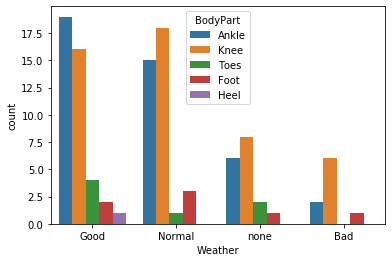

In [33]:
sns.countplot(x="Weather", data=play_injury_panda, hue='BodyPart')

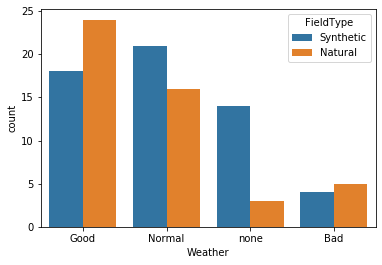

In [34]:
sns.countplot(x="Weather", data=play_injury_panda, hue='FieldType')

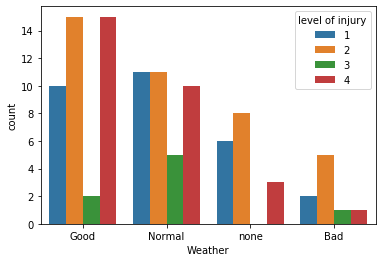

In [35]:
sns.countplot(x="Weather", data=play_injury_panda, hue='level of injury')

Text(0.5, 1.0, 'Synthetic')

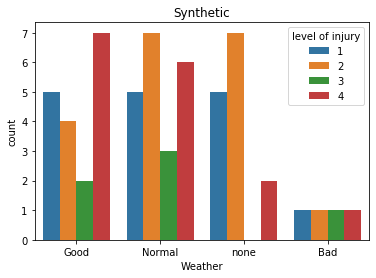

In [36]:
Synthetic_type_panda = play_injury.filter(play_injury.FieldType=='Synthetic').toPandas()
sns.countplot(x="Weather", data=Synthetic_type_panda, hue='level of injury').set_title('Synthetic')

Text(0.5, 1.0, 'Natural')

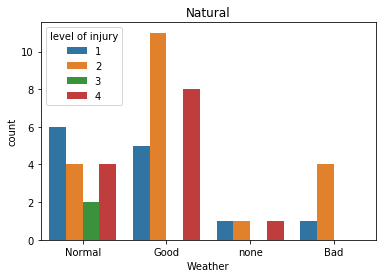

In [37]:
Natural_type_panda = play_injury.filter(play_injury.FieldType=='Natural').toPandas()
sns.countplot(x="Weather", data=Natural_type_panda, hue='level of injury').set_title('Natural')

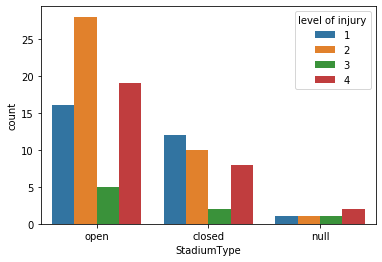

In [38]:
sns.countplot(x="StadiumType", data=play_injury_panda, hue='level of injury')

Text(0.5, 1.0, 'Synthetic')

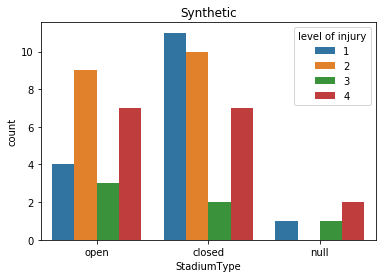

In [39]:
Synthetic_type_panda = play_injury.filter(play_injury.FieldType=='Synthetic').toPandas()
sns.countplot(x="StadiumType", data=Synthetic_type_panda, hue='level of injury').set_title('Synthetic')

Text(0.5, 1.0, 'Natural')

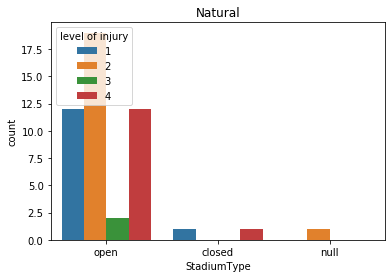

In [40]:
Natural_type_panda = play_injury.filter(play_injury.FieldType=='Natural').toPandas()
sns.countplot(x="StadiumType", data=Natural_type_panda, hue='level of injury').set_title('Natural')

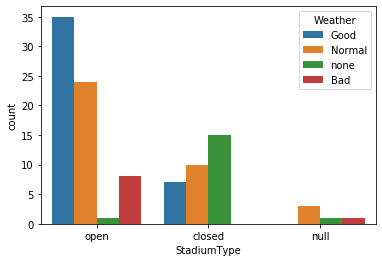

In [41]:
sns.countplot(x="StadiumType", data=play_injury_panda, hue='Weather')

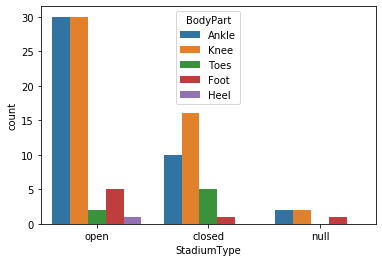

In [42]:
sns.countplot(x="StadiumType", data=play_injury_panda, hue='BodyPart')